In [1]:
#gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [3]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
# tüm kategorileri tanımlıyoruz

categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
#kategori verilerini eğitiyoruz
train = fetch_20newsgroups(subset='train',categories=categories)

In [7]:
# kategori verilerini test ediyoruz.
test = fetch_20newsgroups(subset='test',categories=categories)

In [10]:
#eğitim verisinin ilk 5 verisini yazdırıyoruz
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [12]:
#gerekli paketleri yüklüyoruz
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [14]:
#  multinomial naivebayes oluşturma
model = make_pipeline(TfidfVectorizer(),MultinomialNB())
# eğitim verisile ile modeli eğitme
model.fit(train.data,train.target)
# test verileri için etiket oluşturma
labels = model.predict(test.data)

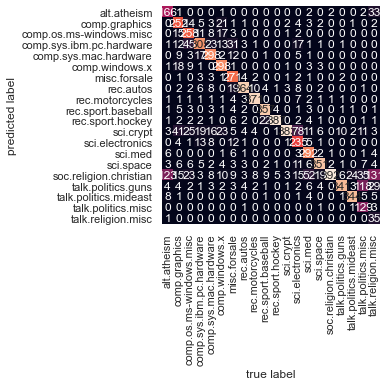

In [15]:
#confusion matrix and heat map oluşturma
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar= False,
            xticklabels = train.target_names, yticklabels=train.target_names)
#plotting conf. matrixs
plt.xlabel('true label')
plt.ylabel('predicted label');

In [16]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [23]:
predict_category('apple macbook vs lenovo thinkpad ')


'comp.sys.mac.hardware'

In [28]:
predict_category('Premier League')


'rec.sport.hockey'

In [31]:
predict_category('Solar system formed in less than 200,000 yrs: scientists')

'sci.space'

In [33]:
predict_category('Post-Brexit trade deal risks erosion of UK workers rights, think tank warns')


'talk.politics.guns'

In [34]:
predict_category('Domestic, foreign currency loans soar in Yangtze River Delta in November')

'talk.politics.mideast'